<a href="https://colab.research.google.com/github/arifsl65/RandomDataAnalysis/blob/main/DhakaAprtmnt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from plotnine import *


%matplotlib inline


In [ ]:
url1= 'https://docs.google.com/spreadsheets/d/e/2PACX-1vSpcQHlntB9-HGEthphGBT2lVz5lHB9a8_2DLhUXCoe_oX7C7PgHtIqlTKCIc86eg-yWsaZ42nwYBdS/pub?output=xlsx'


dhaka_apt  = pd.read_excel(url1)

In [ ]:
type(dhaka_apt)

pandas.core.frame.DataFrame

In [ ]:
dhaka_apt

,title,beds,bath,area,adress,type,purpose,flooPlan,url,lastUpdated,price
0,Eminent Apartment Of 2200 Sq Ft Is Vacant For ...,3,4,"2,200 sqft","Block A, Bashundhara R-A, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/10...,https://www.bproperty.com/en/property/details-...,2022-08-13,50 Thousand
1,"Apartment Ready To Rent In South Khulshi, Near...",3,4,"1,400 sqft","South Khulshi, Khulshi, Chattogram",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/44...,https://www.bproperty.com/en/property/details-...,2022-01-25,30 Thousand
2,"Smartly priced 1950 SQ FT apartment, that you ...",3,4,"1,950 sqft","Block F, Bashundhara R-A, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/11...,https://www.bproperty.com/en/property/details-...,2023-02-22,30 Thousand
3,2000 Sq Ft Residential Apartment Is Up For Ren...,3,3,"2,000 sqft","Sector 9, Uttara, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/14...,https://www.bproperty.com/en/property/details-...,2021-10-28,35 Thousand
4,Strongly Structured This 1650 Sq. ft Apartment...,3,4,"1,650 sqft","Block I, Bashundhara R-A, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/10...,https://www.bproperty.com/en/property/details-...,2023-02-19,25 Thousand
...,...,...,...,...,...,...,...,...,...,...,...
7552,"Picture Yourself, Residing In This Well Constr...",4,4,"3,600 sqft","Sector 3, Uttara, Dhaka",Duplex,For Rent,https://images-cdn.bproperty.com/thumbnails/15...,https://www.bproperty.com/en/property/details-...,2023-02-07,80 Thousand
7553,Flat For Rent In Uttara Sector 13 Near Lubana ...,3,2,900 sqft,"Sector 13, Uttara, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/15...,https://www.bproperty.com/en/property/details-...,2022-02-09,19 Thousand
7554,1000 SQ FT flat for rent in Uttara Sector 13 n...,2,2,"1,000 sqft","Sector 13, Uttara, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/12...,https://www.bproperty.com/en/property/details-...,2022-02-14,22 Thousand
7555,Well Planned Apartment For Rent In Gulshan 1 N...,3,4,"3,600 sqft","Gulshan 1, Gulshan, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/30...,https://www.bproperty.com/en/property/details-...,2023-02-07,1.75 Lakh


In [ ]:
dhaka_apt.drop(dhaka_apt[dhaka_apt['adress'].str.contains('Chattogram')].index, inplace=True)


In [ ]:
dhaka_apt['adress'].replace('Dhaka', '', regex=True, inplace=True)


In [ ]:
dhaka_apt

,title,beds,bath,area,adress,type,purpose,flooPlan,url,lastUpdated,price
0,Eminent Apartment Of 2200 Sq Ft Is Vacant For ...,3,4,"2,200 sqft","Block A, Bashundhara R-A,",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/10...,https://www.bproperty.com/en/property/details-...,2022-08-13,50 Thousand
2,"Smartly priced 1950 SQ FT apartment, that you ...",3,4,"1,950 sqft","Block F, Bashundhara R-A,",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/11...,https://www.bproperty.com/en/property/details-...,2023-02-22,30 Thousand
3,2000 Sq Ft Residential Apartment Is Up For Ren...,3,3,"2,000 sqft","Sector 9, Uttara,",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/14...,https://www.bproperty.com/en/property/details-...,2021-10-28,35 Thousand
4,Strongly Structured This 1650 Sq. ft Apartment...,3,4,"1,650 sqft","Block I, Bashundhara R-A,",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/10...,https://www.bproperty.com/en/property/details-...,2023-02-19,25 Thousand
5,"A nice residential flat of 3400 SQ FT, for ren...",5,5,"3,400 sqft","Gulshan 1, Gulshan,",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/15...,https://www.bproperty.com/en/property/details-...,2023-02-14,1.1 Lakh
...,...,...,...,...,...,...,...,...,...,...,...
7552,"Picture Yourself, Residing In This Well Constr...",4,4,"3,600 sqft","Sector 3, Uttara,",Duplex,For Rent,https://images-cdn.bproperty.com/thumbnails/15...,https://www.bproperty.com/en/property/details-...,2023-02-07,80 Thousand
7553,Flat For Rent In Uttara Sector 13 Near Lubana ...,3,2,900 sqft,"Sector 13, Uttara,",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/15...,https://www.bproperty.com/en/property/details-...,2022-02-09,19 Thousand
7554,1000 SQ FT flat for rent in Uttara Sector 13 n...,2,2,"1,000 sqft","Sector 13, Uttara,",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/12...,https://www.bproperty.com/en/property/details-...,2022-02-14,22 Thousand
7555,Well Planned Apartment For Rent In Gulshan 1 N...,3,4,"3,600 sqft","Gulshan 1, Gulshan,",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/30...,https://www.bproperty.com/en/property/details-...,2023-02-07,1.75 Lakh


In [ ]:
dhaka_apt['last_address_part'] = dhaka_apt['adress'].str.split(',').str[1].str.strip()

print(dhaka_apt[['adress', 'last_address_part']])

                          adress last_address_part
0     Block A, Bashundhara R-A,    Bashundhara R-A
2     Block F, Bashundhara R-A,    Bashundhara R-A
3             Sector 9, Uttara,             Uttara
4     Block I, Bashundhara R-A,    Bashundhara R-A
5           Gulshan 1, Gulshan,            Gulshan
...                          ...               ...
7552          Sector 3, Uttara,             Uttara
7553         Sector 13, Uttara,             Uttara
7554         Sector 13, Uttara,             Uttara
7555        Gulshan 1, Gulshan,            Gulshan
7556            Baridhara DOHS,                   

[5332 rows x 2 columns]


In [ ]:

frequency_counts = dhaka_apt['last_address_part'].value_counts()



In [ ]:
frequency_counts.head(50)

                                  1085
Uttara                             960
Mirpur                             452
Bashundhara R-A                    302
Dakshin Khan                       294
Gulshan                            205
Baridhara                          166
Rajuk Uttara Apartment Project     143
Badda                              127
Adabor                             109
Banasree                           108
Mohammadpur                        105
Section 1                           73
Section 12                          67
Ahmed Nagar                         57
Cantonment                          45
Shah Ali Bag                        39
Mansurabad Housing Society          38
Hazaribag                           38
Khilkhet                            37
Block E                             32
Dolipara                            30
Dhanmondi                           30
Agargaon                            30
Aftab Nagar                         26
Nikunja                  

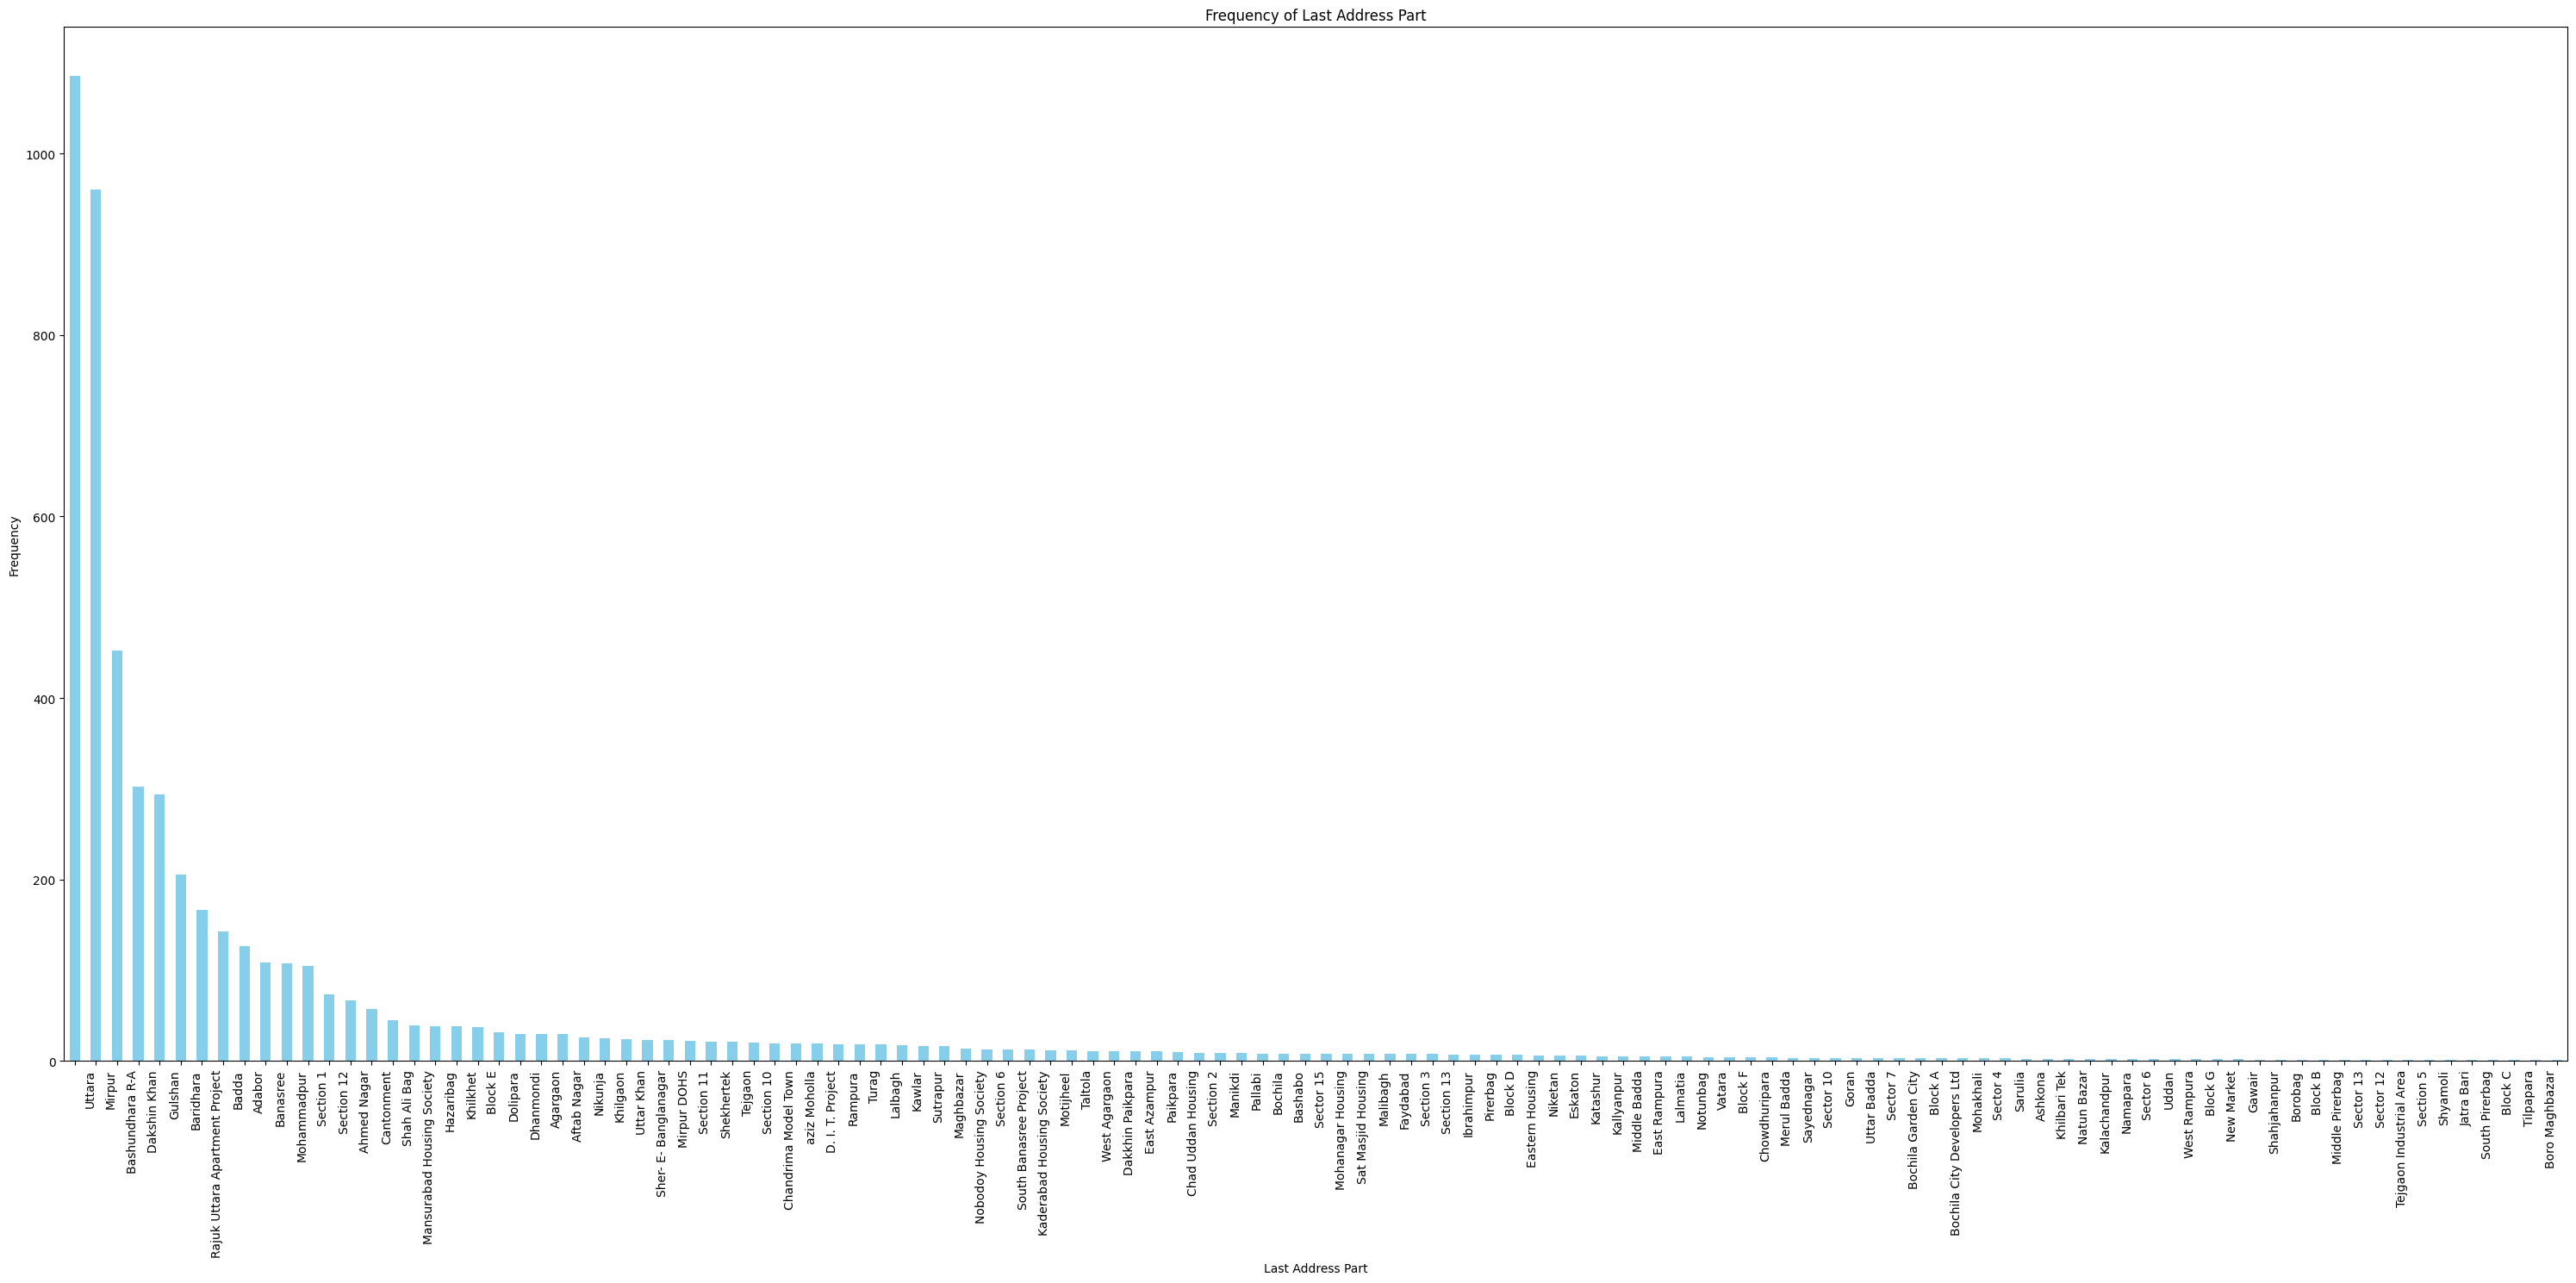

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

value_counts = dhaka_apt['last_address_part'].value_counts()

# Plot a bar chart
plt.figure(figsize=(30, 15))
value_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Last Address Part')
plt.xlabel('Last Address Part')
plt.ylabel('Frequency')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
import folium
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter



# # Sample 30% of the data
# sampled_df = dhaka_apt.sample(frac=0.3, random_state=42)

# # Create a map centered at a specific location (e.g., Dhaka, Bangladesh)
# map_center = [23.8103, 90.4125]
# my_map = folium.Map(location=map_center, zoom_start=12)

# # Geocode each address in the sampled data and plot it on the map
# geolocator = Nominatim(user_agent="my_geocoder")
# geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)  # Throttle requests to 1 second

# for index, row in sampled_df.iterrows():
#     location = geocode(row['adress'])
#     if location:
#         folium.Marker([location.latitude, location.longitude], popup=row['adress']).add_to(my_map)


# my_map.save("address_map_sampled.html")


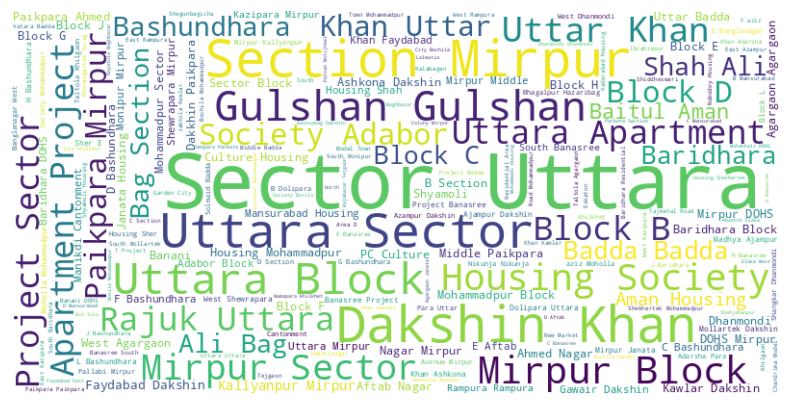

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt



all_addresses = ' '.join(dhaka_apt['adress'].dropna())


wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_addresses)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
# import matplotlib.pyplot as plt



# # Sample 30% of the data
# sampled_df = dhaka_apt.sample(frac=0.3, random_state=42)

# # Create a scatter plot with bubble sizes based on a numerical column
# plt.figure(figsize=(10, 6))
# scatter = plt.scatter(sampled_df['longitude_column'], sampled_df['latitude_column'],
#                       s=sampled_df['numerical_column'] * 50,  # Adjust the multiplier for bubble size
#                       alpha=0.7)

# # Add labels and title
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# plt.title('Bubble Chart of Addresses')

# # Add a legend
# plt.legend(*scatter.legend_elements("sizes", num=6), title="Bubble Size")

# # Show the plot
# plt.show()


In [ ]:
import pandas as pd



def convert_price(price_str):
    try:
        if 'thousand' in price_str.lower():
            return int(price_str.split()[0]) * 1000
        else:
            return int(price_str)
    except ValueError:
        return None


dhaka_apt['price'] = dhaka_apt['price'].apply(convert_price)

print(dhaka_apt[['price']])
